### Exploratory Data Analysis

    Given any sort of raw data, the first thing I'll try to do is understand the data, as it comprises the
    raw materials from which the solution will be built. Given that the task is to predict a house's sale
    price, we want to understand the prices of the houses we are looking at, and look at how each of 
    the data points available influence the house price.
    
    This analysis will help provide insights that will serve in how we clean, prepare and transform the data,
    prior to modelling the problem.
    
    To inform a disciplined study of the problem, we will go through the following processes:
    
    1. Univariate Analysis: In this step, we will focus on `SalePrice` to try to know a little bit about it
    
    ... Documenting steps as I go through each...

**Exploratory Data Analysis:**

    1. Understand the problem: We will look at each variable and do a philosophical analysis about their 
       meaning and importance for this problem
    2. Univariable study. We'll just focus on the dependent variable ('SalePrice') and try to know a 
       little bit more about it.
    3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
    4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
    5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

**Import Packages**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler

import utils

In [2]:
%matplotlib inline

In [3]:
# Seaborn Settings
sns.set() # Theme

### Prepare Data

#### Import Data

In [4]:
def wrangle_data(data_path):
    """Given a data - stored in a particular file-path - import
    and manipulate data set for easier analysis
    
    Parameters:
    -----------
    data_path : str
        File path to the data source
        
    Returns:
    --------
    df : pd.DataFrame
        A pandas DataFrame
    """
    
    # Import data (from csv file)
    df = pd.read_csv(data_path)
    
    # Drop `low-high cardinality` features
    drop_cols = ["Id"]
    
    
    
    # Drop features
    df.drop(columns=drop_cols, inplace=True)
    
    return df

In [5]:
#     # Drop `Multi-collinearity` features
#     drop_cols = ["1stFlrSF", "YearBuilt", "TotRmsAbvGrd"]
    
#     # Drop `low-and-high cardinality` features
#     drop_cols.append("Id")
    
#     # Find and drop features > 15% missing data
#     percent_missing_data = (df.isna().sum() / df.isna().count()).sort_values(ascending=False)
#     missing_data_cols = percent_missing_data[percent_missing_data > 0.15].index
#     drop_cols.extend(missing_data_cols)
    
#     # Drop obversations with NaN
# #     df.dropna(inplace=True)
    
    
#     # Drop Columns
#     df.drop(columns=drop_cols, inplace=True)

In [6]:
df = wrangle_data("data/train.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [8]:
df.shape

(1460, 80)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

    Observations
    
    Our dataset has 1,460 observations and 71 features (or data-points). One thing we will need to check
    is where the number of observations are unique and not duplicated. Further, given that the dataset
    contains 71 data-points, we will have to find a way to analysis this data for data points that are 
    relevant to predicting sale price.
    
    In some sort of way, we will need to conduct features selection; this will be done gradually through
    out this analysis.

    💡 By looking at the data-info, we observe that PoolQC, Fence, MiscFeature, FireplaceQu, Alley, etc
    have a lot of missing values in them. Therefore, we will need to handle these missing values in the
    process.
    
    💡 Feature `Id` looks like it represents a count of the observations; we will have to delete this as
    it provides no meaning to the problem.

In [10]:
# Drop "Id" columns
# df.drop(columns="Id", inplace=True)

### Explore

    Firstly, we will start by conducting a Univariate Analysis/Study on the `SalePrice`. The purpose for this is
    to get knowledge about variable - We will perform some basic analysis including Measures of Central Tendency,
    and Measures of Variability.

**Univariate Analysis of `SalePrice`**

We will start by looking at the `Mean`, `Mode` and `Median`.

In [11]:
sale_price = df['SalePrice']

# Mode
mode = stats.mode(sale_price, axis=None)
mode_series = pd.Series(data={"mode": mode[0][0]})

# Min, Max, Median Price
agg = (
    sale_price
    .aggregate(['mean', 'median'])
    .append(mode_series)
    .to_frame()
)

agg.columns = ["SalePrice"]
agg

,SalePrice
mean,180921.19589
median,163000.00000
mode,140000.00000


    💡 The Mean, Median and Mode differ by about 20,000. This indicates the presense of outliers. Generally
    thinking about it, we would expect a distribution for selling price where the majority of house fall within
    a certain bracket and a few houses would be more expensive or less expensive.
    
    Let's inspect a few distribution to check this further.

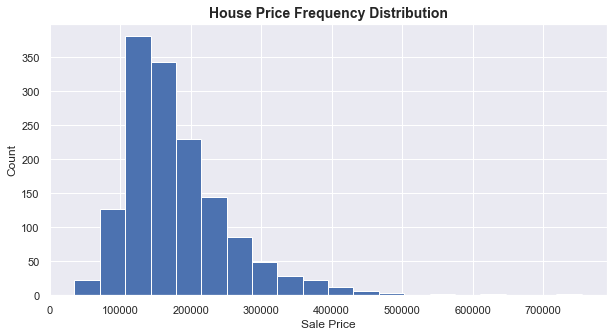

In [12]:
# `SalePrice` Distribution
utils.plot_distribution_hist(sale_price, "House Price Frequency Distribution", "Sale Price", "Count")

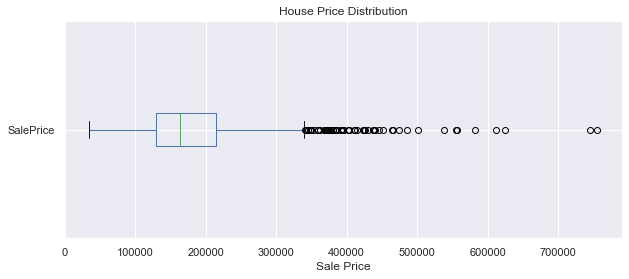

In [13]:
utils.plot_distribution_boxplot(sale_price, "House Price Distribution", "Sale Price")

* `SalePrice` is not normally distribution, as we confirmed earlier by looking at the Mean, Mode and Median.
  Ideally, `SalePrice` should be normally distributed; mean, mode and median should be equal.
* `SalePrice` is right-skewed
* In the boxplot, we observe the presense of outlier houses
    * 75% of the houses had a selling price less than ~220,000 USD.
    * 50% of the houses had a selling price less than the median (163,000 USD)
    
* 🎯 Going forward, we will have to deal with outliers; remove houses with selling prices that are way above
  the average houses.
* 🎯 We will also have to deal with the distribution to make sure it is normally distributed.
    

What's the difference between the least and most expensive house?

In [14]:
print("Range: ${}".format(sale_price.max() - sale_price.min()))

Range: $720100


**Deal with missing values**

    Earlier in our analysis, we observed the presense of features with missing values. We can look for
    those, and remove them for our features.
    
    In dealing with missing values, we will ask the following questions:
    * What features are missing data?
    * How prevalent is the missing data?
    * Is it missing at random or does it have a pattern?

In [15]:
# Number of missing values in each features
num_missing_values_per_feature = df.isna().sum().sort_values(ascending=False)
# Total values expected
total_fields_expected = df.isna().count()

missing_vals = pd.DataFrame(
    data={
        "Missing": num_missing_values_per_feature,
        "Total Expected": total_fields_expected,
        "Missing (% of total)": round((num_missing_values_per_feature / total_fields_expected) * 100, ndigits=3)
    }
).sort_values(by="Missing", ascending=False)

# Filter out features without missing values
missing_vals = missing_vals[missing_vals["Missing"] >= 1]
print(missing_vals.shape)
missing_vals.head()

(19, 3)


,Missing,Total Expected,Missing (% of total)
PoolQC,1453,1460,99.521
MiscFeature,1406,1460,96.301
Alley,1369,1460,93.767
Fence,1179,1460,80.753
FireplaceQu,690,1460,47.260


In [16]:
missing_vals.head(19)

,Missing,Total Expected,Missing (% of total)
PoolQC,1453,1460,99.521
MiscFeature,1406,1460,96.301
Alley,1369,1460,93.767
Fence,1179,1460,80.753
FireplaceQu,690,1460,47.260
LotFrontage,259,1460,17.740
GarageFinish,81,1460,5.548
GarageQual,81,1460,5.548
GarageType,81,1460,5.548
GarageYrBlt,81,1460,5.548


* We can see that `PoolQC`, `MiscFeature`, `Alley`, and `Fence`, are missing over 80% of the data-points, and
  `FireplaceQu` is missing 47% of data-points.
* 🎯 We can remove these features? Why? These features don't provide enought data that tells us anything about
  the house price. Further, the majority of houses will not have these features.
  
* 🎯 For now, if a feature is missing above 15% of data-points, we can remove it from out our data. Else, where
  necessary, we will impute the missing values or drop obversations with missing values.

In [17]:
# Find features a list of features with 15% > missing data
missing_data_mask = num_missing_values_per_feature / total_fields_expected
missing_features_cols = missing_data_mask[missing_data_mask > 0.15].index

# Drop from df
df.drop(columns=missing_features_cols, inplace=True)

* We see that all the garage features have 81 missing data points. Here, we can infer that 81 houses didn't
  have a garage, and that's why these features are missing.
  
  Let's check these

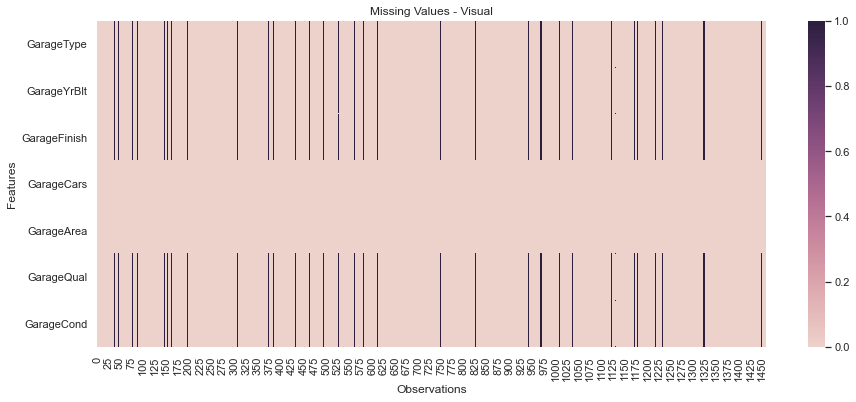

In [18]:
# List of `Garage` features
garage_features = ['GarageType','GarageYrBlt', 'GarageFinish', 
                   'GarageCars', 'GarageArea', 'GarageQual','GarageCond']

# DataFrame with garage features
df_garage = df[garage_features]

# Draw Axis
plt.subplots(figsize=(15, 6))

# Heatmap
sns.heatmap(df_garage.isna().transpose(), cmap=sns.cubehelix_palette(as_cmap=True))

# Labels
plt.title("Missing Values - Visual")
plt.xlabel("Observations")
plt.ylabel("Features")

plt.show();

* We can see that the data has a pattern; if a house is missing a data point on `GarageType`, it will have a
  a missing data on all other garage features. However, something of interest here is that `GarageArea` and 
  `GarageFinish` have data-points on these houses. This refutes our speculations earlier that these houses 
  didn't have a garage. Probably, it's that this data-points where not reported for these houses.
  
* 🎯 Observe that the observations with missing data are spread across the entire dataset. Therefore, we can
  fill in the missing values for these data-points using a ffill (using data from previous non-missing data-
  point)
* We can do the same for the other variables

In [19]:
# Fill missing values
df.fillna(method="ffill", inplace=True)

**Inspect for leaky features**

    If we look at our data carefully, we observe that we have data on the `MoSold`, `YrSold`, `SaleType` and
    `SaleCondition`. These features are leaky features as they tell pass information about the `SalePrice` that
    we wouldn't want to model.
    
    We can easily spot them by asking ourselves this questions: Why this feature be available for a new house?
    If the answer is no, then we'd have to remove them from our analysis. I think they'd be good features to
    look at for some descriptive analysis, but for modelling, they provide us with no help.

In [20]:
# Remove leaky features
leaky_features = ["MoSold", "YrSold", "SaleType", "SaleCondition"]
df.drop(columns=leaky_features, inplace=True)

**Multivariate Analysis on `SalePrice` vs `other features`**

    In order to understand our data, we will look at each variable and try to understand its meaning
    and relevance to this problem.
    
    In order to have some discipline in my analysis, we will adopt the idea of creating a spreadsheet
    with the following columns:
    
    1. Variable: Variable name
    2. Type: Variable's type; either `numerical` - int, float or `categorical` - for categorical values
    3. Segment: Identification of the variable's segment. We define three possible segments: building, 
       space or location.
    4. Expectation: Our expectation about the variable influence in `SalePrice.` We can define a categorical
       scale of `High`, `Medium` or `Low`
    5. Conclusion: Our conclusions about the importance of the variable, after we give a quick look at the
       data. We can define a categorical scale of `High`, `Medium` or `Low`.
    6. Comments: Any general comments

Analyst found here - [Spreadsheet](https://docs.google.com/spreadsheets/d/1HXOq9GMguCRamvw5YH8CQJececkYsrNYrpygL_pMJ3M/edit?usp=sharing)

    After a subjective and research analysis of each variable's relevance to `SalePrice`,
    I ended up with the following features:

|Feature|Expectation|Comments|
|-------|-----------|-------|
|MSZoning|High|We'd expect the zoning classification to incluenece the price of a house. E.g. With all otherfactors constant, a home in commercial zoning would be priced differently from that in industrail zoning.|
|Neighborhood|High|Definitely, neighborhood affects the price of a house|
|OverallQual|High|Overall material and finish of a house matters in pricing|
|OverallCond|High|Overall condition matters in pricing too|
|1stFlrSF|High|First floor area basically tells us how big the house is in surface area, therefore, it matters|
|2ndFlrSF|High|Same as first floor area|
|GrLivArea|High|Same as the 1stFlrSF and 2ndFlrSF|
|HouseStyle|Medium|We'd expect a different in pricing between 1Story and 2Story building|
|TotBsmtSF|Medium|With all other factors constant, a house with a bigger basement would be more expensive|
|Bedroom|Medium|For obvious reasons, this matters|
|GarageCars|Medium|A house with a garage that can have more cars might be pricy|
|GarageArea|Medium|The bigger the garage area, the more cars can pack in it. There might be multi-collinearity here|
|PoolArea|Medium|The presense of a swimming pool hicks the house price|
|MiscFeature|Medium|Depending on the Misc Feature, the price might be influence or not|

`Analyze Numerical Features`

**SalePrice vs TotalBsmtSF**

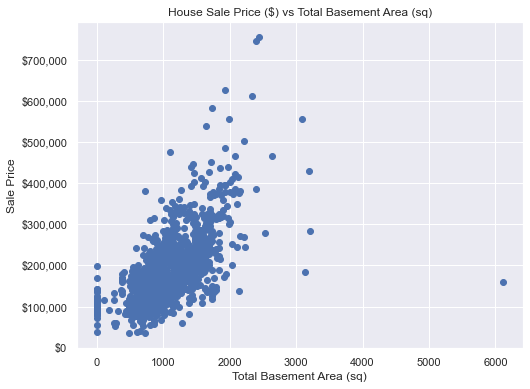

In [21]:
utils.plot_scatter_plot(
    x=df['TotalBsmtSF'], 
    y=sale_price, 
    title="House Sale Price ($) vs Total Basement Area (sq)",
    xlabel="Total Basement Area (sq)",
    ylabel="Sale Price"
)

In [22]:
print("Sale Price vs TotalBsmtSF Correlation:", round(sale_price.corr(df['TotalBsmtSF']), 2))

Sale Price vs TotalBsmtSF Correlation: 0.61


* `Total Basement Area (sq)` and `Sale Price` are correlated, positively. As the total basement are increases,
  so does the house selling price.
* However, one housing unit had the highest total basement area with a selling price of ~170,000 (USD) compared
  the the most expensive house above 700,000 (USD).
* We all see the presense of outliers in the scatter-plot

**Sale Price vs 1stFlrSF**

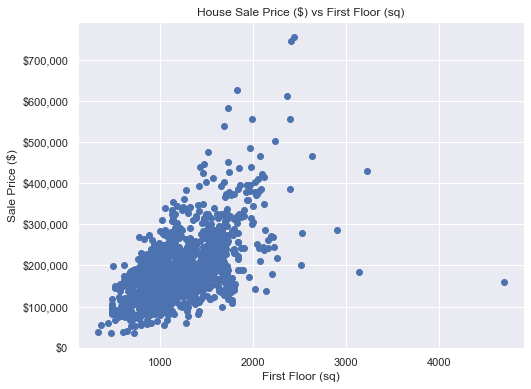

In [23]:
utils.plot_scatter_plot(
    x=df['1stFlrSF'],
    y=sale_price,
    title="House Sale Price ($) vs First Floor (sq)",
    xlabel="First Floor (sq)",
    ylabel="Sale Price ($)"
)

**Sale Price vs 2stFlrSF**

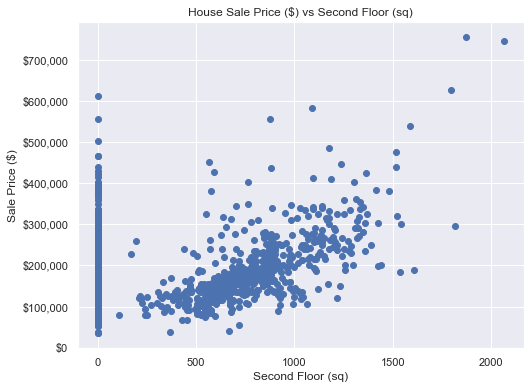

In [24]:
utils.plot_scatter_plot(
    x=df['2ndFlrSF'],
    y=sale_price,
    title="House Sale Price ($) vs Second Floor (sq)",
    xlabel="Second Floor (sq)",
    ylabel="Sale Price ($)"
)

**Sale Price vs GrLivArea**

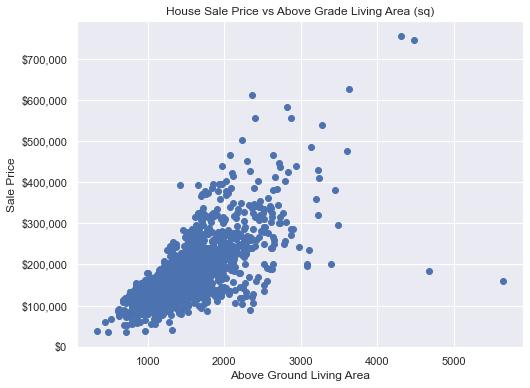

In [25]:
utils.plot_scatter_plot(
    x=df["GrLivArea"],
    y=sale_price,
    title="House Sale Price vs Above Grade Living Area (sq)",
    xlabel="Above Ground Living Area",
    ylabel="Sale Price"
)

**Sale Price vs GarageArea**

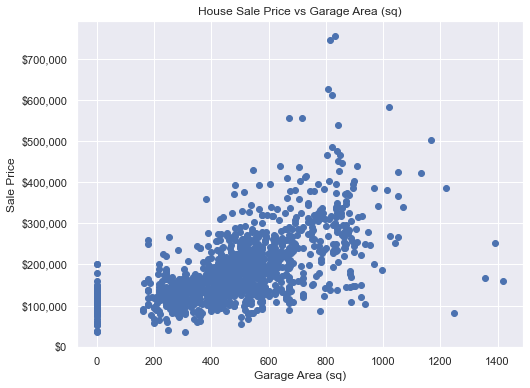

In [26]:
utils.plot_scatter_plot(
    x=df["GarageArea"],
    y=sale_price,
    title="House Sale Price vs Garage Area (sq)",
    xlabel="Garage Area (sq)",
    ylabel="Sale Price"
)

**Sale Price vs PoolArea**

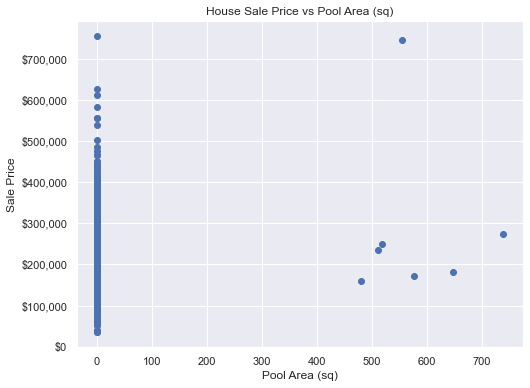

In [27]:
utils.plot_scatter_plot(
    x=df["PoolArea"],
    y=sale_price,
    title="House Sale Price vs Pool Area (sq)",
    xlabel="Pool Area (sq)",
    ylabel="Sale Price"
)

**Summary observation**

* `1stFlrSF`, `2ndFlrSF`, `GrLivArea`, and `GarageArea` are also show a slighly high correlation with `SalePrice`.
* However, all features show us the presense of outliers.
* In an analysis of `2ndFlrSF` and `SalePrice`, we see houses with a Second Floor Surface Area of zero but varying
  in house price. We also see the relationship Garage Area and more apparent in Pool Area. This is probably cause
  these houses didn't have these features.

* 🎯 Because most houses didn't have a swimming pool, `PoolArea` is a candidate for features with low cardinality.
  Because all houses besides 7 didn't have a swimming pool, this feature tells us nothing about the house price.

In [28]:
# Remove `PoolArea`
df.drop(columns="PoolArea", inplace=True)

`Analyze Categorical Features`

**Sale Price vs Neighborhood**

💡 How does neighborhood influence the house price? Is it the case that houses are priced different based on the
  neighborhood they are in? E.g. Houses in posh neighborhoods will cost more than those in less posh neighbor-
  hoods?

In [29]:
nghbrhood_counts = df["Neighborhood"].value_counts(normalize=True).sort_values()

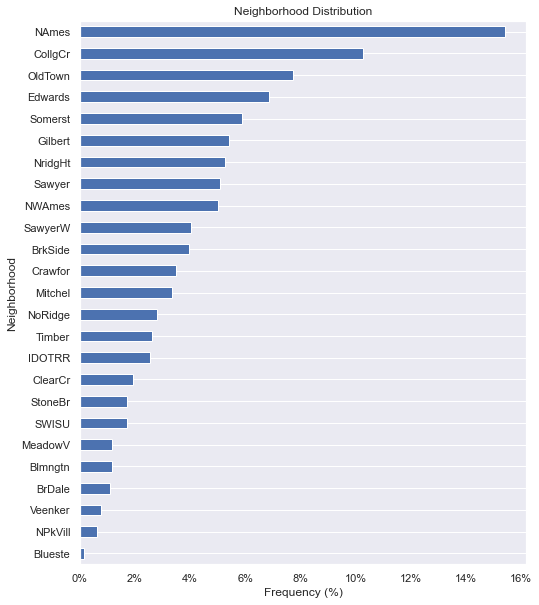

In [30]:
utils.plot_bar(
    data=nghbrhood_counts,
    title="Neighborhood Distribution",
    ylabel="Neighborhood",
    ticks_range=np.arange(0.0, 0.18, 0.02),
    labels=["0%", "2%", "4%", "6%", "8%", "10%", "12%", "14%", "16%"]
)

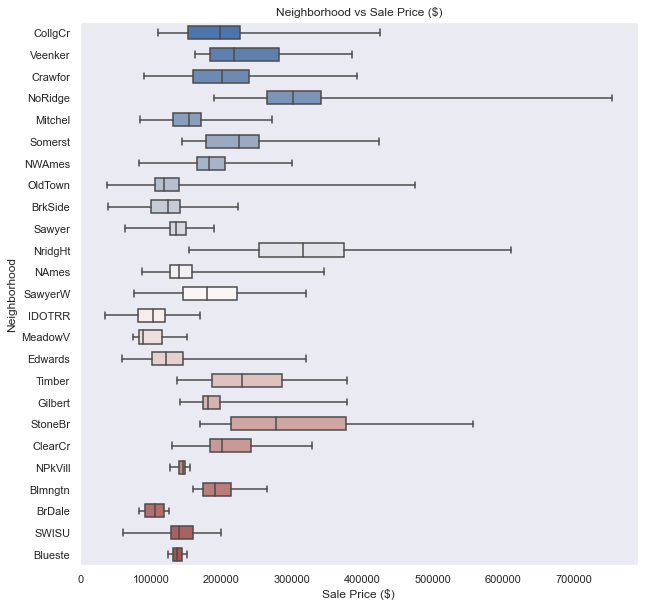

In [31]:
# House Prices per Neighborhoods
utils.plot_box(
    data=df, 
    x="SalePrice", 
    y="Neighborhood", 
    title="Neighborhood vs Sale Price ($)",
    xlabel="Sale Price ($)",
    ylabel="Neighborhood"
)

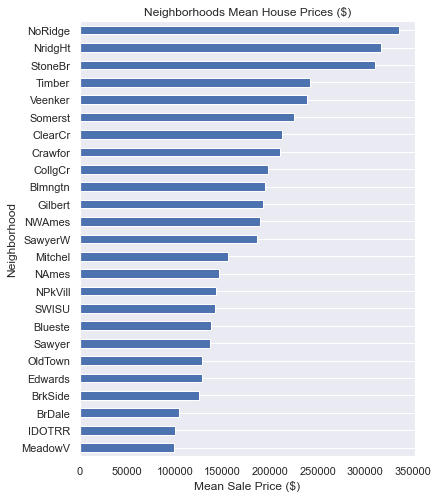

In [32]:
fig, ax = plt.subplots(figsize=(6, 8))

# Barplot
df.groupby(by="Neighborhood")["SalePrice"].mean().sort_values().plot(kind="barh")

# Labels
plt.title("Neighborhoods Mean House Prices ($)")
plt.ylabel("Neighborhood")
plt.xlabel("Mean Sale Price ($)")

# Add x-grid lines
plt.grid(axis="x", linewidth=0.5, linestyle="--");

* We see that `16%, ~11% and 8%` of the houses in our sample data come from `North Ames`, `College Creek` and
  `Stone Brook`, respectively.
* The least bottop 5 least represented neighborhoods are `Bluestem`, `Northpath Villa`, `Veenker`, `Briardale`
  and `Meadow Village`.
* On avg, the top five most expensive neighborhoods to buy a house in are `Northridge`, `Northridge Heights`, 
  `Stone Brook`, `Timberland` and `Veenker`.
    * Makes sense; if we google the most expensive places to live in Iowa, we see that 
    [`Ames` ranks 2.](https://www.homesnacks.com/most-expensive-cities-in-iowa/)
    `Northridge`, `Northridge Heights`, and `Stone Brook` are all in `Ames` where as `Veenker` is a neighborhood
    around a Golf Course.

**SalePrice vs HouseStyle**

💡 How does a house's style influence it's selling price? Is it that Two Story houses are more expensive that
  One Story houses? How's the distribution of house styles in our sample dataset? Which house styles are more
  prevalent?

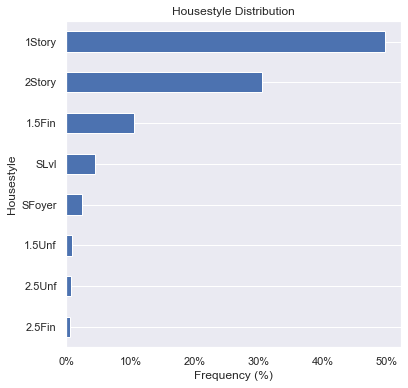

In [33]:
# What type of styles do the houses have?
housestyle = df["HouseStyle"].value_counts(normalize=True).sort_values()

utils.plot_bar(
    data=housestyle, 
    title="Housestyle Distribution", 
    ylabel="Housestyle",
    ticks_range=np.arange(0.0, round(housestyle.max() + 0.1, 2), 0.1),
    labels=["0%", "10%", "20%", "30%", "40%", "50%"],
    figsize=(6, 6)
)

* Nearly `70%` of house styles are either `1Story` or `2Story`.
* `1.5Unf`, `2.5Unf`, `2.5Fin`, `SFoyer` and `SLvl` represent less than 10% of houses.
  🎯 We can merge these into other style

In [36]:
df["HouseStyle"] = df["HouseStyle"].apply(utils.map_house_style)

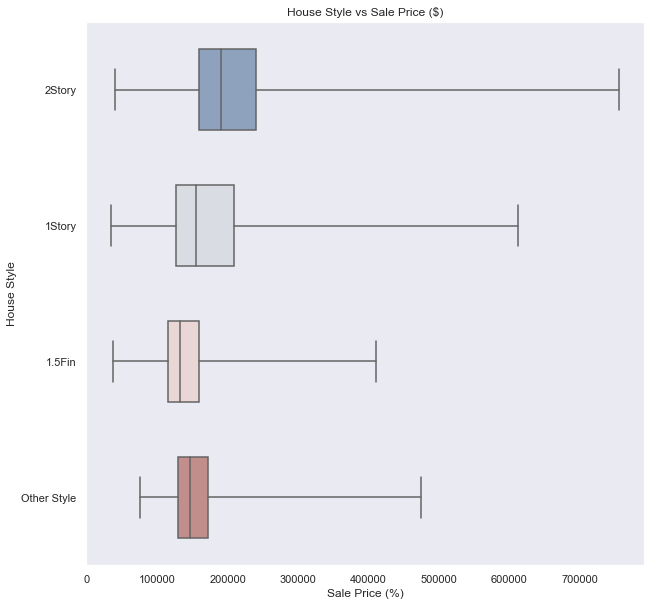

In [37]:
utils.plot_box(df, "SalePrice", "HouseStyle", "House Style vs Sale Price ($)", "Sale Price (%)", "House Style")

* `1Story` and `2Story` houses have selling prices with a wider range.

**SalePrice vs OverallCond**

💡 How does the Overrall Condition of a house affect it's selling price? Does the house price increase with
  overall condition?

In [40]:
# Change dtype
df["OverallCond"] = df["OverallCond"].astype('category')

overall_cond = df["OverallCond"].value_counts(normalize=True).sort_values()

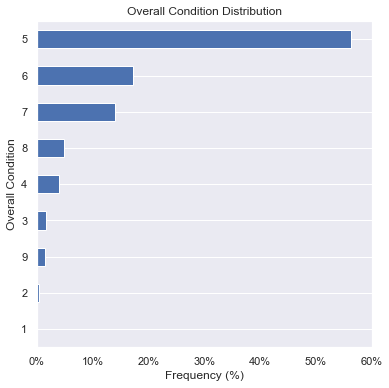

In [42]:
# Distribution of Overall Condition
utils.plot_bar(
    overall_cond, 
    "Overall Condition Distribution",
    "Overall Condition",
    ticks_range=np.arange(0.0, overall_cond.max() + 0.1, 0.1),
    labels=["0%", "10%", "20%", "30%", "40%", "50%", "60%"],
    figsize=(6, 6)
)

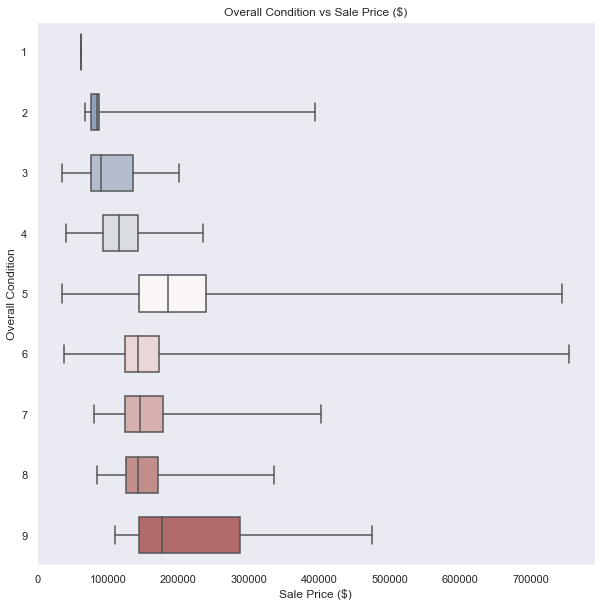

In [43]:
utils.plot_box(
    data=df, 
    y="OverallCond", 
    x="SalePrice", 
    title="Overall Condition vs Sale Price ($)", 
    xlabel="Sale Price ($)", 
    ylabel="Overall Condition"
)

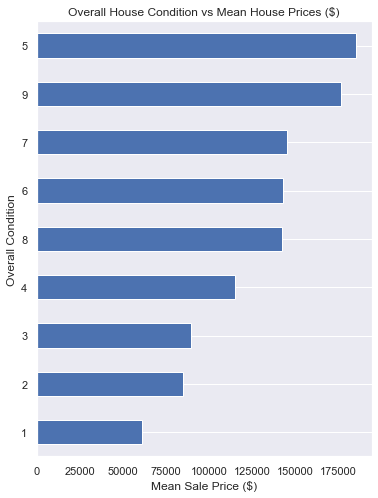

In [46]:
fig, ax = plt.subplots(figsize=(6, 8))

# Barplot
df.groupby(by="OverallCond")["SalePrice"].median().sort_values().plot(kind="barh")

# Labels
plt.title("Overall House Condition vs Mean House Prices ($)")
plt.ylabel("Overall Condition")
plt.xlabel("Mean Sale Price ($)")

# Add x-grid lines
plt.grid(axis="x", linewidth=0.5, linestyle="--");

* Over `50%` of houses were given a rating of `5 -> Average` and `20%` were given a rating of `6 -> Above Average`
  in terms of `Overall Condition`.
* Despite that the fact the few houses were rated higher and very low, we still observe a tendency such that
  median house price increases as the overall condition of the house does.

**SalePrice vs Bedroom**

In [47]:
df["BedroomAbvGr"] = df["BedroomAbvGr"].astype('category')

bedroom = df["BedroomAbvGr"].value_counts(normalize=True).sort_values()
bedroom

8    0.000685
0    0.004110
6    0.004795
5    0.014384
1    0.034247
4    0.145890
2    0.245205
3    0.550685
Name: BedroomAbvGr, dtype: float64

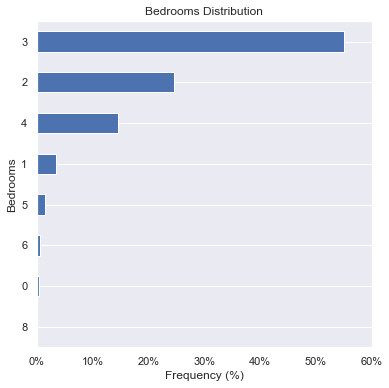

In [53]:
# Distribution of Bedrooms
utils.plot_bar(
    bedroom, 
    "Bedrooms Distribution",
    "Bedrooms",
    ticks_range=np.arange(0.0, overall_cond.max() + 0.1, 0.1),
    labels=["0%", "10%", "20%", "30%", "40%", "50%", "60%"],
    figsize=(6, 6)
)

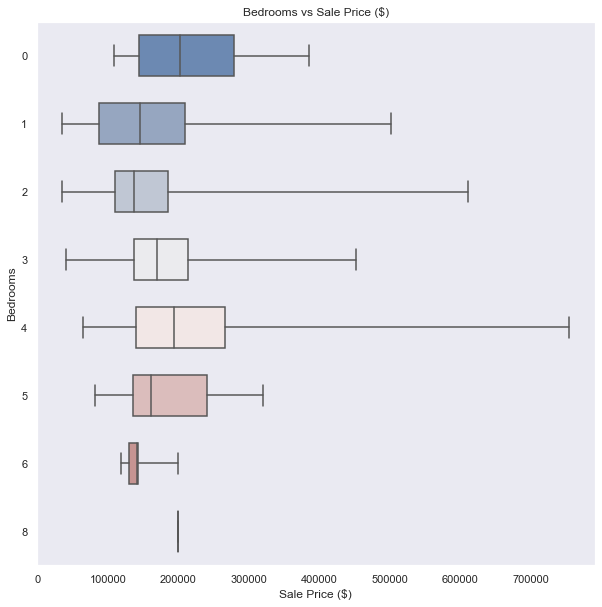

In [49]:
utils.plot_box(
    data=df, 
    y="BedroomAbvGr", 
    x="SalePrice", 
    title="Bedrooms vs Sale Price ($)", 
    xlabel="Sale Price ($)", 
    ylabel="Bedrooms"
)

* `75%` of houses have `2 or 3 bedrooms` above ground; 25% and 50% of the houses are 2-bedrooms and 3-bedrooms,
    respectively.
* If we look at the median house prices vs bedroom size, we see variables between 150,000 USD and 200,000 USD.
  E.g. Therefore, we can conclude (slightly probability) that bedroom size affects house price.

**SalePrice vs GarageCars**

💡 Earlier in the analysis, we sall that `GarageArea` has a positive correlation with `SalePrice`; as the garage
  area increased, so did the selling price. In inspecting the relationship between `GarageCars` and `SalePrice`,
  we'd expect that the more cars can be packed in a house's garage, the more expensive it will be.
  
🎯 First, let's have a look at the `correlation` between `GarageArea` and `GarageCars`

In [59]:
garage_car_corr_area = df["GarageCars"].corr(df["GarageArea"])
print("Correlation between a garage's space and number of cars that can be packed:", round(garage_car_corr_area, 2))

Correlation between a garage's space and number of cars that can be packed: 0.88


🎯 We will have to check for `Auto-Correlation` later

In [60]:
df["GarageCars"] = df["GarageCars"].astype("category")

garage_car_capacity = df["GarageCars"].value_counts(normalize=True).sort_values()
garage_car_capacity

4    0.003425
0    0.055479
3    0.123973
1    0.252740
2    0.564384
Name: GarageCars, dtype: float64

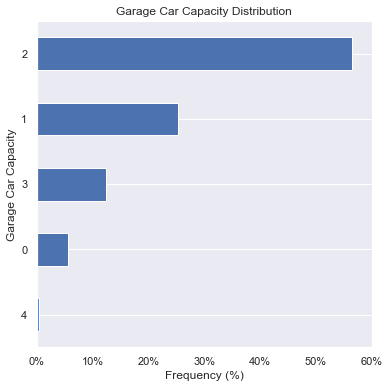

In [61]:
# Size of Garage (Car Capacity) Distribution
utils.plot_bar(
    garage_car_capacity, 
    "Garage Car Capacity Distribution",
    "Garage Car Capacity",
    ticks_range=np.arange(0.0, overall_cond.max() + 0.1, 0.1),
    labels=["0%", "10%", "20%", "30%", "40%", "50%", "60%"],
    figsize=(6, 6)
)

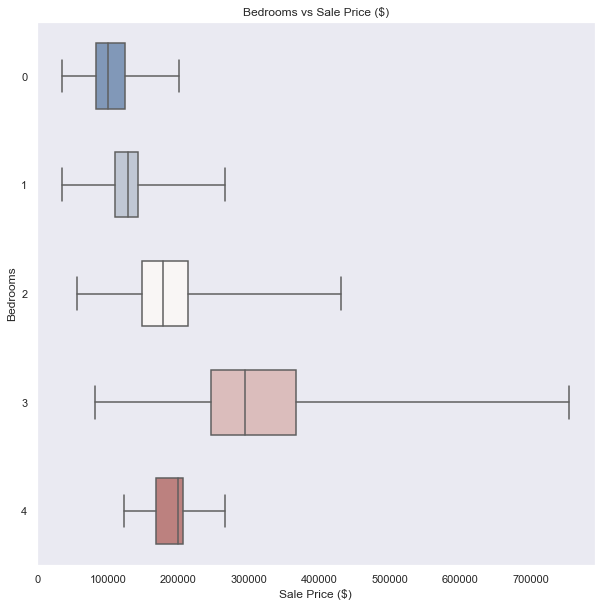

In [62]:
utils.plot_box(
    data=df, 
    y="GarageCars", 
    x="SalePrice", 
    title="Bedrooms vs Sale Price ($)", 
    xlabel="Sale Price ($)", 
    ylabel="Bedrooms"
)

* `50%` of houses have a garage with a capacity of 2 cars
* We can see the expensive houses are associated with a garage with more capacity for cars. E.g. Houses without
  a garage are the least expensive.

**Correlation Matrix**

    Here, we will explore the relationships in our data by calculating the correlation between them. This will
    enable us to see which features influence `SalePrice` and how, and which features are correlated with each
    other.

In [ ]:
# Correlation
corr = df.corr()

In [ ]:
# Draw Axis
fig, ax = plt.subplots(figsize=(12, 10))

# HeatMap
sns.heatmap(corr, vmax=.8, square=True);

    Summary
    
    * From a first glass, we see that `TotalBsmtSF` and `1stFlrSF` are highly correlated with each other; 
    multi-collinearity exists here. We can drop-off the feature with the smallest correlation between the two.
    * We also observe multi-collinearity on the features `OverallQual` <> `YearBuilt.` This makes sense; the
    overall quality of a house correlates with the year it was built; we'd expect a house built in 2022 to be 
    of good quality compared that built in the year 1990.
    
    * We also observe that SalePrice is correlated with `OverallQual`, `TotalBsmtSF`, `GarageArea`, 
    and `GrLivArea` - features we identified in our initial analysis.

In [ ]:
# Pick 10 highest correlated features
cols = corr.nlargest(10, 'SalePrice')["SalePrice"].index
# Calculate corr among those features
sale_price_top10_corr = df[cols].corr()

# Draw Axis
fig, ax = plt.subplots(figsize=(10, 8))
# Heatmap
sns.heatmap(sale_price_top10_corr, annot=True)
plt.show();

    The following are the 10 most correlated features:
    
    * `OverallQual`, `GrLivArea` and `GarageArea` are the most correlated features with `SalePrice`.
    * `GrLivArea` <> `TotRmsAbvGrd` and `TotalBsmtSF` <> `1stFlrSF` are correlated between themselves; this
    indicates multi-collinearity. Therefore, we remove the least correlated features to `SalePrice` in the
    pairs.

**Scatter plots between `SalePrice` and correlated variables**

In [ ]:
sns.set()

# Most correlated features
corr_feats = ["SalePrice", "OverallQual", "GrLivArea", "GarageArea", "TotalBsmtSF", "FullBath", "YearRemodAdd"]
# Pairplots
sns.pairplot(df[corr_feats]);

**Missing Data**

- How prevelant is the missing data?
- Is missing data random or does it have a pattern?

In [ ]:
# Number of missing values per column
total = df.isna().sum().sort_values(ascending=False)
# Percent of missing values per column
percent = ((df.isna().sum() / df.isna().count())).sort_values(ascending=False)

# Missing Data: DF
missing_data = pd.DataFrame(data={
    "Total": total,
    "Percent": percent
})

missing_data.head(20)

    Analysis
    
    * The features `PoolQC`, `MiscFeature`, `Alley`, etc have over 80% of the data missing; these features should
    be dropped from other data.
    * The garage features `GarageCond`, `GarageQual`, etc are missing 81 data points; it could be that the houses
    corresponding to these features didn't have a garage.
    * Same for the basement and masonry features.
    * Electical is only missing 1 data point, so we will remove this observations
    
    In general, if a feature has more than 15% of data missing, we will delete it. Otherwise, we will keep it,
    delete entries with those missing data points or try out imputation strategies.

In [ ]:
# percent_missing_data = (df.isna().sum() / df.isna().count()).sort_values(ascending=False)
# missing_data_cols = percent_missing_data[percent_missing_data > 0.15].index
# df.drop(columns=missing_data_cols)

In [ ]:
# df.dropna(inplace=True)

**Outliers**

Outliers are data points that appear extreme or outside the pattern compared to all other data-points in
a given variable. When building a model with data containing outliers, the model can be greatly affected
in performance; model a relationship that is not the case.

Therefore, it's important to detect and deal with outliers. Their are several methods for dealing with
outliers (Inter-Quartile Range, Standard Deviation, Z-Score, etc). However, in this analysis, we will do
a quick analysis through the standard deviation of `SalePrice` and a set of scatter-plots.

[Outlier Detection](https://towardsdatascience.com/outlier-detection-part1-821d714524c)

`SalePrice Univariate Analysis`

In [ ]:
sale_price.head()

In [ ]:
std_scaler = StandardScaler() # Instantiate StandardScaler
saleprice_scaled = std_scaler.fit_transform(df.loc[:, ["SalePrice"]]) # Transform data to have a mean=0 and std=1

# Top/Bottom 10 Distributions
lower = sorted(saleprice_scaled[:, 0])[:10]
upper = sorted(saleprice_scaled[:, 0])[-10:]

In [ ]:
print("Lower Range Distribution")
print(np.array(lower))

In [ ]:
print("Upper Range Distribution")
print(np.array(upper))

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

# Histogram
pd.Series(saleprice_scaled[:, 0]).plot(kind="hist", bins=20)

# Labels
plt.title("House Sale Price Distribution (Standardized Values)")
plt.ylabel("Frequency")
plt.xlabel("Sale Price (Standardized)");

    Observations
    
    * The majority of houses are similar; their standardized value is close to zero.
    * A small number of houses have a standard deviation of 2; the upper range values
      indicate the presense of outliers values; potentially going to 7 standard 
      deviations.
    
    * To deal with these, we can define a threshold, in-terms of standard deviations, 
      and remove any observations that are below or above that threshold.
      E.g.
      - Threshold = 2 Standard Deviations
      - Remove any observations that are more than 2 standard deviations above or below
        the mean.

In [ ]:
threshold_std = 2 # Number of standard Deviations to cap values
price_deviation = sale_price.std() * threshold_std # Calculate the price deviation

lower_bound = sale_price.mean() - price_deviation
upper_bound = sale_price.mean() + price_deviation

print("Upper bound:", upper_bound)
print("Lower bound:", lower_bound)

In [ ]:
# Filter data to remove observations below the lower bound and above the upper bound
# df = df[(df["SalePrice"] > lower_bound) & (df["SalePrice"] < upper_bound)]
df.shape

`SalePrice Bivariate Analysis`

In [ ]:
# SalePrice vs GrLivArea
utils.plot_scatter_plot(
    x=df["GrLivArea"],
    y=df["SalePrice"],
    title="House Sale Price vs Above Grade Living Area (sq)",
    xlabel="Above Ground Living Area",
    ylabel="Sale Price"
)

    Summary
    * We see two outlier houses with `GrLivArea` values of above 4000 yet their house price is lower than
      200,000 (USD).
    * We also see two outlier houses with `SalePrice` above 700,000 (USD) and `GrLivArea` above 4000. Further,
      we also see a couple of houses with sale prices slightly here. Note that these are the houses we observed
      to have `price deviation` above two standard deviations from the mean. Here, we remove all houses with
      `GrLivArea` 4000.

In [ ]:
print("Size of data before removing outliers:", df.shape)

# Filter data to remove outlier houses based on `GrLivArea`
grlivarea_mask = df["GrLivArea"] < 4000
df = df[grlivarea_mask]

print("Size of data after removing outliers:", df.shape)

In [ ]:
# SalePrice vs TotalBsmtArea
utils.plot_scatter_plot(
    x=df['TotalBsmtSF'], 
    y=df["SalePrice"], 
    title="House Sale Price ($) vs Total Basement Area (sq)",
    xlabel="Total Basement Area (sq)",
    ylabel="Sale Price"
)

    Summary
    * We see a couple of outliers, but since the data points follow the trend, we will keep this.

`Note:` We can perform this analysis on all variables, but here, we will limit our analysis to these two for reason to do with just learning the techniques.